# Coursera Capstone - Battle of the Cities (Code)




In [806]:
import numpy as np

In [807]:
# @hidden_cell
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_d8f0c100ea2a47078f882836baf8aa05 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Z4wvsi6lSQjcvH_oE2XqV_2wJ9Db_xp87wXkna4IHlet',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_d8f0c100ea2a47078f882836baf8aa05.get_object(Bucket='courseracapstone-donotdelete-pr-ln3lnkesy1oaof',Key='worldcities.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)




In [910]:
cities = df_data_1[df_data_1.population >= 1000000]


cities_europe = cities[cities.country.isin(["Germany","Austria","Belarus","Belgium","Bulgaria","Czechia","Denmark","Finland","France","Greece","Hungary","Ireland","Italy","Netherlands","Poland","Portugal","Romania","Serbia","Spain","Sweden","Switzerland","Turkey","Ukraine","United Kingdom"])]
cities_europe


,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
18,Istanbul,Istanbul,41.1050,29.0100,Turkey,TR,TUR,İstanbul,admin,10061000.0,1792756324
19,Paris,Paris,48.8667,2.3333,France,FR,FRA,Île-de-France,primary,9904000.0,1250015082
25,London,London,51.5000,-0.1167,United Kingdom,GB,GBR,"London, City of",primary,8567000.0,1826645935
46,Madrid,Madrid,40.4000,-3.6834,Spain,ES,ESP,Madrid,primary,5567000.0,1724616994
56,Barcelona,Barcelona,41.3833,2.1834,Spain,ES,ESP,Catalonia,admin,4920000.0,1724594040
80,Ankara,Ankara,39.9272,32.8644,Turkey,TR,TUR,Ankara,primary,3716000.0,1792572891
96,Berlin,Berlin,52.5218,13.4015,Germany,DE,DEU,Berlin,primary,3406000.0,1276451290
98,Rome,Rome,41.8960,12.4833,Italy,IT,ITA,Lazio,primary,3339000.0,1380382862
102,Athens,Athens,37.9833,23.7333,Greece,GR,GRC,Attikí,primary,3242000.0,1300715560
120,Milan,Milan,45.4700,9.2050,Italy,IT,ITA,Lombardy,admin,2945000.0,1380724377


In [809]:
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

In [911]:
# create map of Manhattan using latitude and longitude values
map_europe = folium.Map(location=[48.499, 23.3833], zoom_start=5)

# add markers to map
for lat, lng, label in zip(cities_europe['lat'], cities_europe['lng'], cities_europe['city_ascii']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_europe)  
    
map_europe

### 2.2 Foursquare API

For the cities' characteristics, I will use the _Foursquare API_. With Foursquare you can download the most common sites/venues for each city. These venues can be categorized by their type, such as restaurants, parks or museums. 


In [811]:
import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer

In [812]:
# @hidden_cell
#Changed this code after running because it showed confidential data
CLIENT_ID = 'WGOYBSKFD53VPMIRFJH1ZJXSEEQ3SARJ2SHCCMBQDOISAKKA' # your Foursquare ID
CLIENT_SECRET = 'DFF3Q5ZWIRV0H5CCGWATHVTVVNMTYPFIYBMCVRJ3ACTFANDW' # your Foursquare Secret
VERSION = '20180604'
#LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: WGOYBSKFD53VPMIRFJH1ZJXSEEQ3SARJ2SHCCMBQDOISAKKA
CLIENT_SECRET:DFF3Q5ZWIRV0H5CCGWATHVTVVNMTYPFIYBMCVRJ3ACTFANDW


In [813]:
categories_url = 'https://api.foursquare.com/v2/venues/categories?client_id={}&client_secret={}&v={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
            
# make the GET request
results = requests.get(categories_url).json()

In [814]:
categories_id = []
for i in range(0,10):
    categories_id.append(results['response']['categories'][i]['id'])
    
categories_name = []
for i in range(0,10):
    categories_name.append(results['response']['categories'][i]['name'])


categories_name

['Arts & Entertainment',
 'College & University',
 'Event',
 'Food',
 'Nightlife Spot',
 'Outdoors & Recreation',
 'Professional & Other Places',
 'Residence',
 'Shop & Service',
 'Travel & Transport']

In [815]:
def getNearbyVenues(names, latitudes, longitudes,radius=5000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        
        for cat_name, cat_id in zip(categories_name,categories_id):
            
            # create the API request URL
            url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION, 
                lat, 
                lng, 
                radius,
                cat_id)
            
            # make the GET request
            results = requests.get(url).json()["response"]["totalResults"]
        
            # return only relevant information for each nearby venue
            venues_list.append([(
                name, 
                lat, 
                lng,
                cat_name,
                results)])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['city', 
                      'city Latitude', 
                      'city Longitude',
                      'category',
                      'count']
    
    return(nearby_venues)

In [912]:
cities_venues = getNearbyVenues(names=cities_europe['city'],
                                   latitudes=cities_europe['lat'],
                                   longitudes=cities_europe['lng']
                                  )

Istanbul
Paris
London
Madrid
Barcelona
Ankara
Berlin
Rome
Athens
Milan
Stuttgart
Frankfurt
Lisbon
Katowice
Kyiv
İzmir
Vienna
Mannheim
Birmingham
Naples
Manchester
Bucharest
Minsk
Hamburg
Brussels
Essen
Warsaw
Budapest
Turin
Leeds
Florence
Bursa
Kharkiv
Lyon
The Hague
Marseille
Porto
Adana
Sheffield
Duisburg
Munich
Stockholm
Geneva
Düsseldorf
Sevilla
Sofia
Prague
Glasgow
Helsinki
Zürich
Belgrade
Copenhagen
Dublin
Dnipro
Lille
Gaziantep
Amsterdam
Rotterdam
Cologne


In [913]:
cities_venues

,city,city Latitude,city Longitude,category,count
0,Istanbul,41.1050,29.0100,Arts & Entertainment,174
1,Istanbul,41.1050,29.0100,College & University,171
2,Istanbul,41.1050,29.0100,Event,85
3,Istanbul,41.1050,29.0100,Food,250
4,Istanbul,41.1050,29.0100,Nightlife Spot,180
5,Istanbul,41.1050,29.0100,Outdoors & Recreation,203
6,Istanbul,41.1050,29.0100,Professional & Other Places,199
7,Istanbul,41.1050,29.0100,Residence,211
8,Istanbul,41.1050,29.0100,Shop & Service,178
9,Istanbul,41.1050,29.0100,Travel & Transport,131


## Have a look at the data

In [914]:
import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 

import seaborn as sns

In [916]:
#count toal number of venues for each city
test_count = cities_venues[['city','count']].groupby(['city']).sum()
test_count.columns=['count_all']
test_count

,count_all
city,
Adana,1706
Amsterdam,1690
Ankara,1875
Athens,1664
Barcelona,1469
Belgrade,1371
Berlin,1632
Birmingham,727
Brussels,1665


In [1008]:
#calculate relative occurence of venue categories for each city
test = cities_venues.merge(cities_europe[['city','country','population']], left_on='city', right_on='city')
test = test.merge(test_count, left_on='city', right_on='city')
test = test[test.country.isin (["Germany","Austria","Belgium","Denmark","Finland","France","Greece","Ireland","Italy","Netherlands","Portugal","Spain","Sweden","Switzerland","United Kingdom"])]
test['count']= test['count']/test['count_all']
venues = test.pivot(index='city', columns='category', values='count')



venues_map =venues.merge(cities_europe[['city','country']], left_on='city', right_on='city')


venues

category,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
city,,,,,,,,,,
Amsterdam,0.110651,0.059172,0.006509,0.147929,0.144379,0.128402,0.121302,0.021893,0.127219,0.132544
Athens,0.128005,0.072716,0.005409,0.149639,0.145433,0.125601,0.127404,0.006010,0.117788,0.121995
Barcelona,0.106195,0.050374,0.006807,0.161334,0.115725,0.141593,0.140231,0.014976,0.126617,0.136147
Berlin,0.118260,0.051471,0.004289,0.152574,0.147059,0.136642,0.120711,0.014093,0.127451,0.127451
Birmingham,0.090784,0.089409,0.000000,0.125172,0.088033,0.119670,0.121045,0.034388,0.178817,0.152682
Brussels,0.099099,0.075075,0.005405,0.149550,0.149550,0.128529,0.124925,0.021021,0.122523,0.124324
Cologne,0.081699,0.062908,0.004902,0.150327,0.093137,0.149510,0.134804,0.009804,0.147876,0.165033
Copenhagen,0.107143,0.060496,0.002915,0.158892,0.096939,0.154519,0.128280,0.009475,0.145773,0.135569
Dublin,0.080371,0.064915,0.001546,0.176198,0.136785,0.115920,0.136012,0.034776,0.136012,0.117465


In [945]:
#save coordinates
coordinates = cities_venues

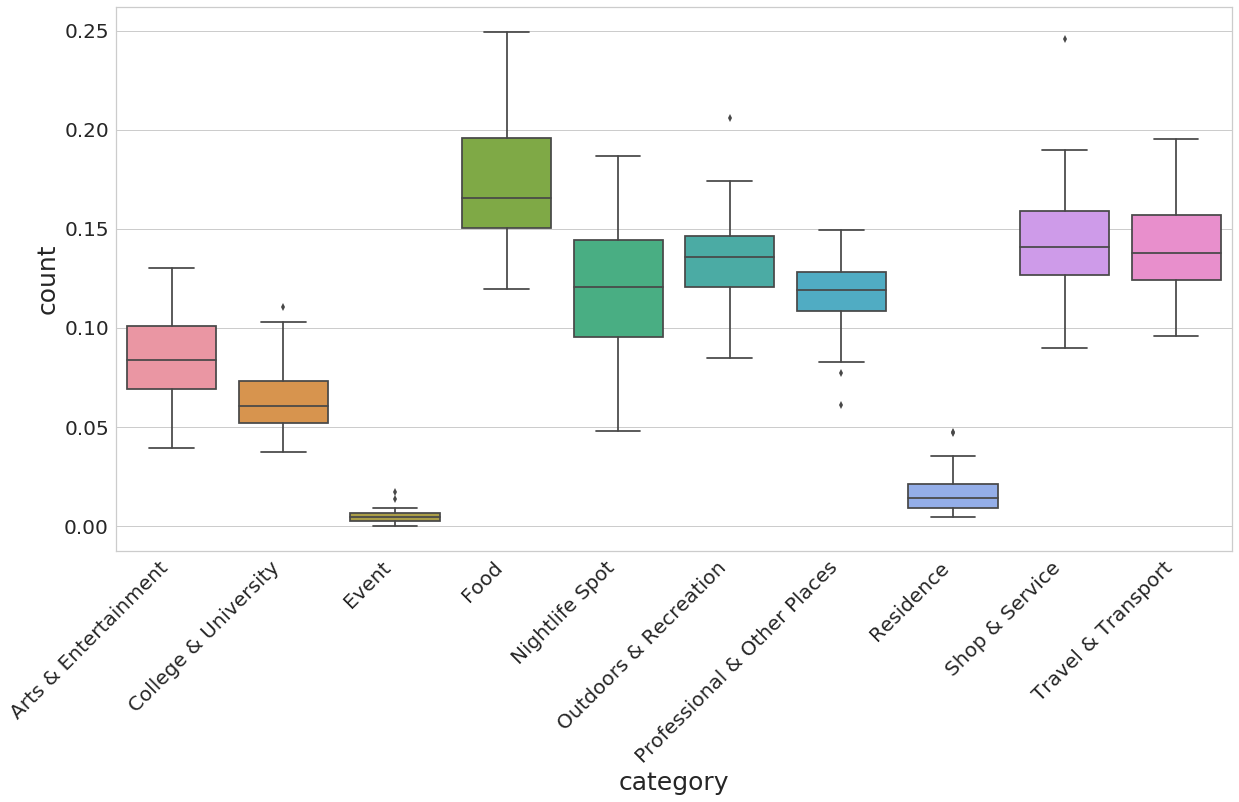

In [947]:
#boxplot venues categories
plt.figure(figsize=(20, 10))
plt.xticks(rotation='horizontal')
sns.boxplot

ax = sns.boxplot(data = venues)
ax.set_ylabel('count', fontsize=25)
ax.set_xlabel('category', fontsize=25)
ax.tick_params(labelsize=20)
plt.xticks(rotation=45, ha='right')

plt.show()

In [948]:
cluster_venues =venues.values

# Transform and standardize!

In [950]:
#transform and standardize the occurences
from sklearn.preprocessing import MinMaxScaler

X = venues.values
X = np.nan_to_num(X)
cluster_venues = MinMaxScaler().fit_transform(X)
cluster_venues

array([[0.78581086, 0.2959853 , 0.37426036, 0.21848963, 0.69505939,
        0.36023457, 0.68368829, 0.40394639, 0.24025526, 0.36771329],
       [0.97648218, 0.48097612, 0.3109976 , 0.23166527, 0.70264685,
        0.33708688, 0.75310497, 0.03630311, 0.17975914, 0.26171472],
       [0.73684965, 0.17583542, 0.39142274, 0.32175187, 0.48878808,
        0.46922657, 0.8990308 , 0.24384031, 0.23639225, 0.40391293],
       [0.86941169, 0.19080683, 0.2466299 , 0.25426705, 0.71435298,
        0.42831899, 0.67696522, 0.22340181, 0.24174383, 0.31653466],
       [0.56752951, 0.7089538 , 0.        , 0.04318926, 0.28944014,
        0.28807901, 0.68077169, 0.69313802, 0.57125526, 0.57005933],
       [0.65888884, 0.51319105, 0.31081081, 0.23097296, 0.73228313,
        0.36127702, 0.72490496, 0.38375247, 0.21012796, 0.28511792],
       [0.46771395, 0.34702294, 0.28186275, 0.2369602 , 0.32618437,
        0.53464286, 0.83728766, 0.12412495, 0.37276838, 0.69415679],
       [0.74726736, 0.31406857, 0.1676384

In [1012]:
cluster_df = pd.DataFrame(cluster_venues)
cluster_df.columns = categories_name
cluster_df.head()

,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,0.785811,0.295985,0.374260,0.218490,0.695059,0.360235,0.683688,0.403946,0.240255,0.367713
1,0.976482,0.480976,0.310998,0.231665,0.702647,0.337087,0.753105,0.036303,0.179759,0.261715
2,0.736850,0.175835,0.391423,0.321752,0.488788,0.469227,0.899031,0.243840,0.236392,0.403913
3,0.869412,0.190807,0.246630,0.254267,0.714353,0.428319,0.676965,0.223402,0.241744,0.316535
4,0.567530,0.708954,0.000000,0.043189,0.289440,0.288079,0.680772,0.693138,0.571255,0.570059


In [1013]:
#choose which variables to drop
cluster_df.drop(['Residence','Event','Food','Travel & Transport','Shop & Service'], 1, inplace=True)


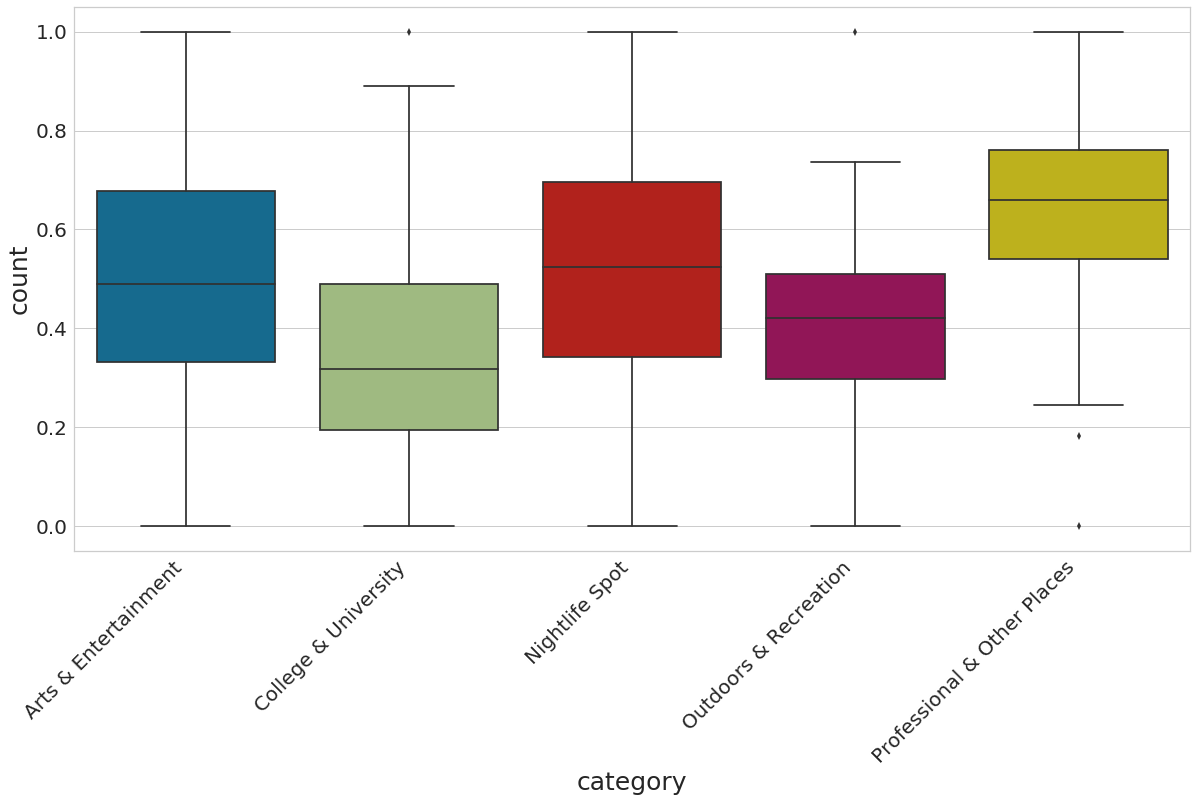

In [996]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation='horizontal')
sns.boxplot

ax = sns.boxplot(data = cluster_df)
ax.set_ylabel('count', fontsize=25)
ax.set_xlabel('category', fontsize=25)
ax.tick_params(labelsize=20)
plt.xticks(rotation=45, ha='right')

plt.show()

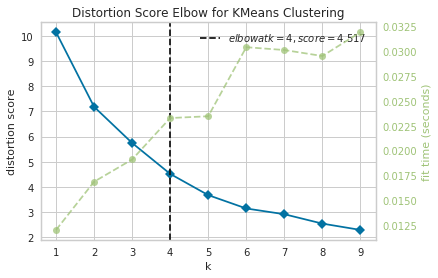

In [997]:

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(cluster_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [1009]:
# set number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(cluster_df)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 3, 0, 2, 0, 2, 3], dtype=int32)

In [1010]:
# add clustering labels
venues.insert(0, 'Cluster Label', kmeans.labels_)


venues_map =venues.merge(cities_europe, left_on='city', right_on='city')

In [1014]:
cluster_df.insert(0, 'Cluster Label', kmeans.labels_)


In [1015]:
venues_map.sort_values('Cluster Label')

,city,Cluster Label,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,...,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Amsterdam,0,0.110651,0.059172,0.006509,0.147929,0.144379,0.128402,0.121302,0.021893,...,Amsterdam,52.3500,4.9166,Netherlands,NL,NLD,Noord-Holland,primary,1031000.0,1528355309
21,London,0,0.126121,0.079036,0.003363,0.139574,0.137892,0.115471,0.127242,0.047646,...,London,51.5000,-0.1167,United Kingdom,GB,GBR,"London, City of",primary,8567000.0,1826645935
40,Vienna,0,0.101587,0.060952,0.002540,0.158095,0.142857,0.123810,0.113651,0.022857,...,Vienna,48.2000,16.3666,Austria,AT,AUT,Wien,primary,2400000.0,1040261752
28,Munich,0,0.098131,0.045394,0.001335,0.166889,0.160881,0.132844,0.110814,0.006676,...,Munich,48.1299,11.5750,Germany,DE,DEU,Bavaria,admin,1275000.0,1276692352
17,Helsinki,0,0.101431,0.044182,0.004356,0.154325,0.121344,0.151213,0.125700,0.021157,...,Helsinki,60.1756,24.9341,Finland,FI,FIN,Uusimaa,primary,1115000.0,1246177997
16,Hamburg,0,0.094745,0.052554,0.008142,0.180607,0.112509,0.131014,0.117691,0.004441,...,Hamburg,53.5500,10.0000,Germany,DE,DEU,Hamburg,admin,1757000.0,1276041799
30,Paris,0,0.130145,0.056901,0.006659,0.151332,0.145884,0.132567,0.108354,0.027845,...,Paris,48.8667,2.3333,France,FR,FRA,Île-de-France,primary,9904000.0,1250015082
12,Florence,0,0.099641,0.073609,0.002693,0.214542,0.134650,0.141831,0.104129,0.015260,...,Florence,43.7800,11.2500,Italy,IT,ITA,Tuscany,admin,1500000.0,1380726561
32,Rome,0,0.106796,0.054785,0.002774,0.166436,0.103329,0.158807,0.142857,0.011096,...,Rome,41.8960,12.4833,Italy,IT,ITA,Lazio,primary,3339000.0,1380382862
7,Copenhagen,0,0.107143,0.060496,0.002915,0.158892,0.096939,0.154519,0.128280,0.009475,...,Copenhagen,55.6786,12.5635,Denmark,DK,DNK,Hovedstaden,primary,1085000.0,1208763942


In [1016]:

# create map
map_clusters = folium.Map(location=[48.499, 23.3833], zoom_start=5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(venues_map['lat'], venues_map['lng'], venues_map['city'], venues_map['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

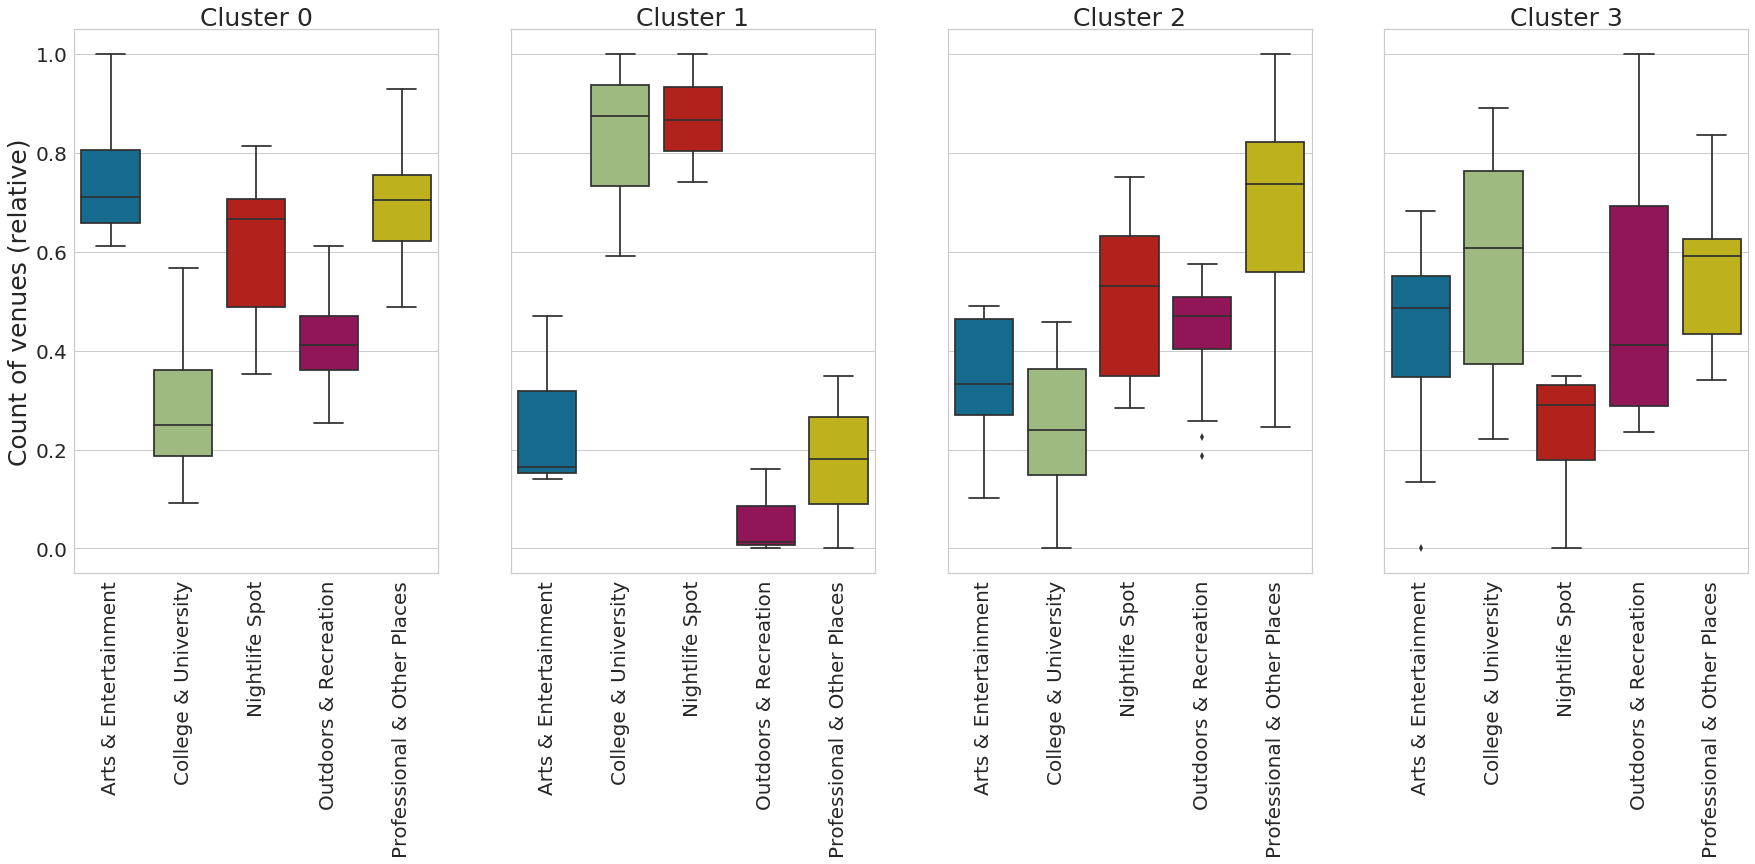

In [1017]:
import matplotlib.ticker as ticker

fig, axes = plt.subplots(1,kclusters, figsize=(30, 10), sharey=True)

axes[0].set_ylabel('Count of venues (relative)', fontsize=25)
#plt.set_xlabel('Venue category', fontsize='x-large')

for k in range(kclusters):
    #Set same y axis limits
    #axes[k].set_ylim(0,1.1)
    axes[k].xaxis.set_label_position('top')
    axes[k].set_xlabel('Cluster ' + str(k), fontsize=25)
    axes[k].tick_params(labelsize=20)
    plt.sca(axes[k])
    plt.xticks(rotation='vertical')
    sns.boxplot(data = cluster_df[cluster_df['Cluster Label'] == k].drop('Cluster Label',1), ax=axes[k])

plt.show()